# Hypothesis Testing

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import samplers as spl
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Example: Fisher's Tea Experiment

Ronald Fisher's friend Muriel Bristol claims that she can tell, by actually drinking the beverage, whether milk was poured in first or second into a cup of tea.  I.e. tea into the milk, or milk into the tea.

Fisher, being an upstanding skeptic, is skeptical; he therefore devises an experiment to test her claim.

**Discussion:** How could we determine whether Muriel is telling the truth?

Fisher's solution is as follows: He prepares six cups of tea, three with tea first and three with milk first.  These cups are then given to Muriel arranged in a random order.

Then Muriel drinks each beverage, and attempts to guess if tea or milk were poured first.  Her results are as follows:

| Cup | Result    |
|----:|----------:|
| 1   | Correct   |
| 2   | Correct   |
| 3   | Correct   |
| 4   | Incorrect |
| 5   | Correct   |
| 6   | Correct   |

**Discussion:** How would you determine whether you believe Muriel or not?  What is the appropriate thing to measure, and how should we measure it?

Fisher, remember, is a skeptic.  He is predisposed to **not** believe Muriel.  So he makes the hypothesis:

> Fisher's Hypothesis: Muriel has *no* ability to tell milk into tea from tea into milk.  Therefore, each of her answers is completely random.

Fisher now asks himself an important question:

> Given that my hypothesis is correct, **how surprising is this data?**

**Discussion**: How should we answer Fisher's question?

Let's take Fisher's hypothesis seriously.  If he is correct, what should we expect the data we observe to look like?

Well, under this hypothesis, the chances of Muriel getting any single cup correctly is .5.   That is, if Fisher is correct, the data we observed would be generated by a simple sequence of coin flips.

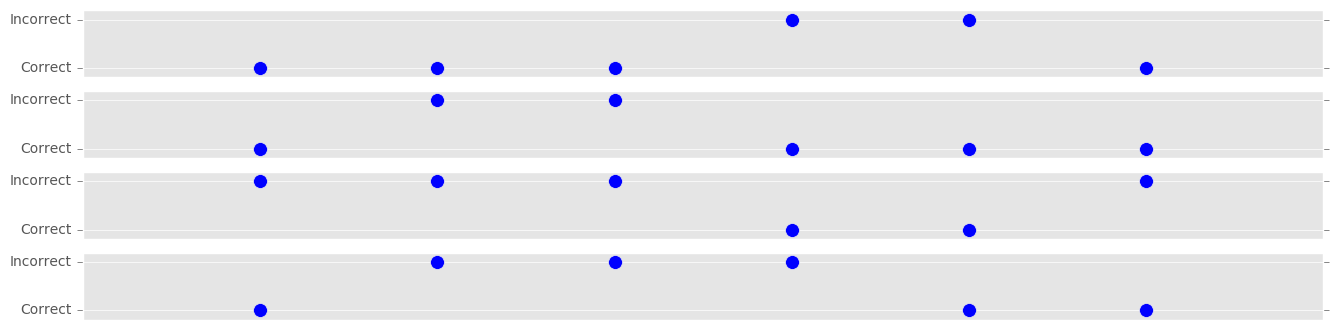

In [2]:
binomial = spl.Binomial(1, .5)

_, axs = plt.subplots(4, 1, figsize=(16, 4))

for ax in axs.flatten():
    sample = binomial.sample(6)
    ax.scatter(range(1, 7), sample, s=100)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Correct', 'Incorrect'])
    ax.set_xticks(())

Instead of considering the specific sequence of correct or incorrect answers, it seems more natural to consider the **number** of correct and incorrect answers.

**Question:** What is the distribution of the number of correct answers by Muriel under Fisher's hypothesis?

If Fisher is correct, and Muriel's answers are totally random, then the distribution of the number of cups Muriel gets correct is a Binomial distribution:

$$\text{# of cups guessed correctly} \sim Binomial(n=6, p=.5)$$

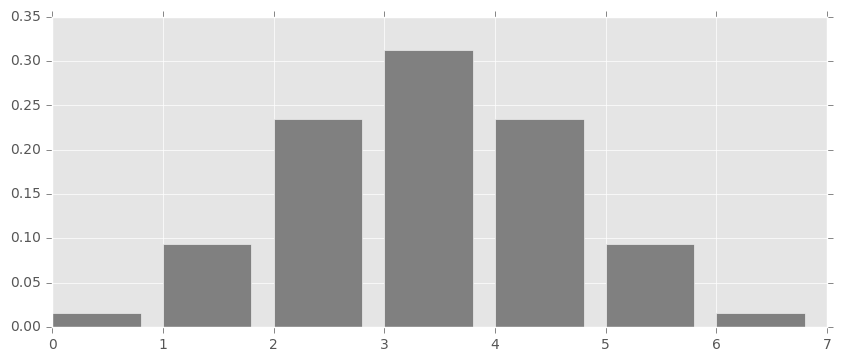

In [3]:
binomial = spl.Binomial(6, .5)
_, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.bar(range(7), [binomial.pdf(i) for i in xrange(7)], color='grey')

Muriel guessing all but one correctly seems like an extremely surprising event given this assumption.  We can characterize our **degree of surprise in the data given our assumption** by calculating the following probability:

$$P(\text{Observing this Data} \mid \text{Fisher's Assumption})$$

In our example, we can actually calculate this probability exactly from the binomial distribution:

$$P(\text{Observing this Data} \mid \text{Fisher's Assumption})={{6}\choose{5}}(.5)^5(.5)^{6-5}=6 \times (.5)^6$$

In [4]:
6*(.5)**6

0.09375

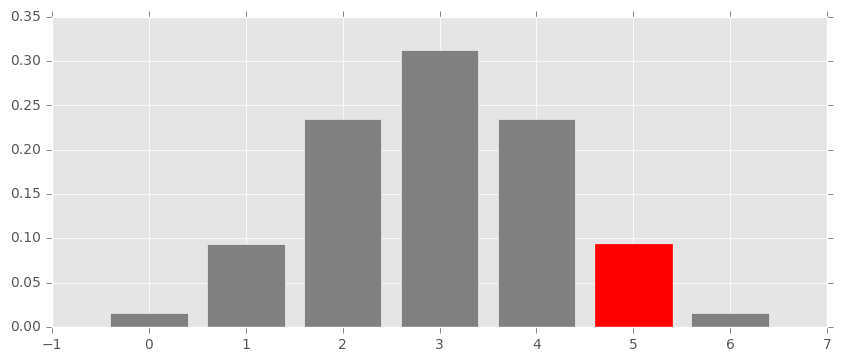

In [5]:
bernoulli = spl.Binomial(6, .5)
_, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(7), [bernoulli.pdf(i) for i in xrange(7)], align='center', color='grey')
bars[5].set_color('red')

Fisher observed that, in fact, he would have been surprized if he had observed this data **or any data even more extreme than this**, so a more correct measure of surprise would be:

$$P(\text{Observing Data As Or More Extreme} \mid \text{Fisher's Assumption})={{6}\choose{5}}(.5)^5(.5)^{6-5}+{{6}\choose{6}}(.5)^6(.5)^{6-6}=6 \times (.5)^6 + 1 \times (.5)^6=7 \times (.5)^6$$

In [6]:
7*(.5)**6

0.109375

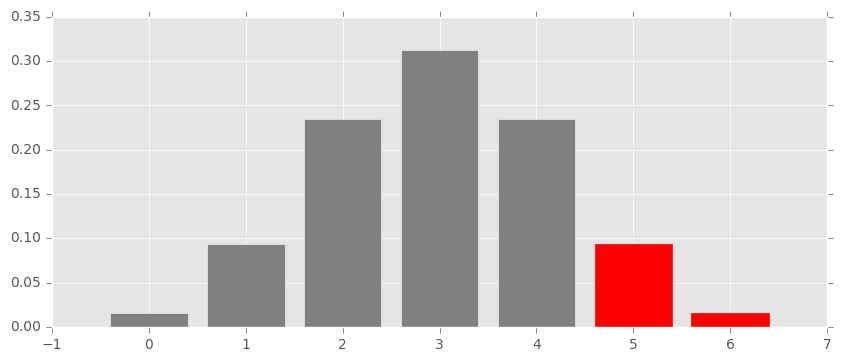

In [7]:
binomial = spl.Binomial(6, .5)
_, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(7), [binomial.pdf(i) for i in xrange(7)], align='center', color='grey')
bars[5].set_color('red')
bars[6].set_color('red')

We can calculate this number easily in Python:

In [8]:
binomial = spl.Binomial(6, .5)

probability = 1 - binomial.cdf(4)
print('Probability of Observing Data Equal or More Extreme than Actual: {}'.\
      format(probability))

Probability of Observing Data Equal or More Extreme than Actual: 0.109375


We now have a different sort of problem, how do we *interpret* this level of surprise?  Are we surprised of not?

**Discussion:** Are we surprised?  Is your answer to this question affected by looking at the number?

## Hypothesis Testing: The Big Picture

The tea example was reported in Fisher's classic text *The Design of Experiments*, and it is a prototypical example of the logic behind Hypothesis Testing.  [Fisher in fact prepared not six but eight cups of tea (four with tea first and the other four with milk first).  Bristol correctly deduced whether tea or milk was poured in first in all eight cases.]

#### State a Scientific Question

State a scientific question (a yes/no question) of interest that can be answered with data that you have collected or intend to collect.

In Fisher's tea experiment the scientific question is "Can Muriel identify milk into tea from tea into milk?"

#### Take a Skeptical Stance, and Clearly State This Hypothesis

The skeptics stance is called the **Null Hypothesis**.

In Fisher's experiment, the Null Hypothesis is:

> "Muriel cannot tell the difference, and hence is guessing at random."

#### State the Opposite of Your Skeptical Hypothesis

The opposite of the Null Hypothesis is called the **Alternate Hypothesis**.  It **must** be the exact opposite of the Null, so that the null and the alternate hypotheses cover *all* possibilities.

Our alternative hypothesis in the tea case is:

> "Muriel is not guessing randomly."

**Note:** This alternative hypothesis covers two cases!  On one hand, Muriel *could* be better than chance, but Muriel could also be worse!

#### Create a Probabilistic Model of the Situation Assuming the Null Hypothesis is True

The Null Hypothesis generally states that some process is governed by only chance, so conceptualize exactly how the data is being generated probabilistically.

In Fisher's example, our probabilistic model is:

$$\text{# of cups guessed correctly} \mid \text{Muriel is guessing randomly} \sim Binomial(n=6, p=.5)$$

#### Decide How Surprised You Need to Be to Reject Your Skeptical Assumption

Before looking at any data, set a threshold for your skepticism, which is traditionally labeled $\alpha$.  This threshold can be based on many considerations.

We neglected to do this in our tea example.

**Note:** It is a common practice to set a threshold or $\alpha=.05$ with no thought of reflection.  This is a source of much consternation in statistical circles, and you should not do so without reflection.

#### Collect Your Data

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created

This calculated conditional probability is called the **p-value**.

In Fisher's example, the calculated p-value is:

$$P(\text{Observing Data As Or More Extreme} \mid \text{Null Hypothesis})={{6}\choose{5}}(.5)^5(.5)^{6-5} + {{6}\choose{6}}(.5)^6(.5)^{6-6}$$

#### Compare the p-value to Your Stated Rejection Threshold

If the p-value is smaller than your rejection threshold, you must reject your Null Hypothesis as **inconsistent with the data you collected**.

That is, you have demonstrated, to your stated tolerance, that your skeptical stance is unlikely to be true.

A useful way to think of this is:

- Skeptical Stance: I will act as if my skeptics stance is true.  (Null Hypothesis)
- Alternate Stance: I will act as if my skeptics stance is not true.  (Alternate Hypothesis)
  
In the case that your computed p-value is smaller than your stated threshold, you must act as if the skeptic's hypothesis is **not true** (though, of course, it may very well be and you just got unlucky).

#### Publish Your Data and Code Online With Explicit Instruction for Replicating Your Result

:)

### Comments

If you happen to *not* find sufficient evidence to reject your null hypothesis, **you have not proven that your null hypothesis is true**.

Indeed, the entire procedure was predicated on *assuming* the null was true *until sufficient evidence is found to make this stance untenable*.  If you do not reject the null, you simply continue to hold this skeptic's stance until more evidence comes along and you need to re-evaluate.

## Examples of Common Hypothesis Tests

### One Sample Exact Test of Population Proportion

Matt is all about consistency in skateboarding, and is learning to kickflip.  He does not want to move onto another trick until he can cleanly land a kickflip 80% of the time.

Being a scientist, he is skeptical of himself, and assumes the following hypothesis until he can prove otherwise:

> Null Hypothesis: $P(\text{Matt lands a kickflip})<.8$

On a particularly uneventful Saturday, Matt keeps track of 100 kickflip attempts.  He does quite well, and lands 84 of them.

**Question:** Should Matt move on to another trick?

#### Create a Probabilistic Model of the Situation Assuming the Null Hypothesis is True

We would like to create a probabilistic model of Matt's kickflip ability under the null hypothesis that:

> Null Hypothesis: $P(\text{Matt lands a kickflip})<.8$

The alternate hypothesis is then:

> Alternate Hypothesis: $P(\text{Matt lands a kickflip})\ge.8$

What we really want to know now is the probability Matt lands $k$ out of 100 kickflips.  To get there, we need to make one additional assumption: that each kickflip is independent of the rest.  This allows us to come up with a full probabilistic model under the Null:

$$\text{# of kickflips landed} \mid \text{Null Hypothesis} \sim Binomial(n=100, p=.8)$$

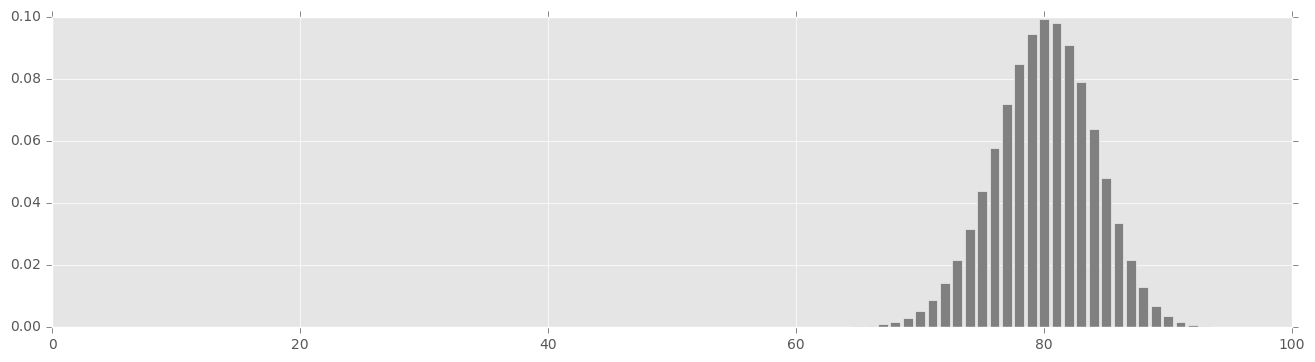

In [9]:
binomial = spl.Binomial(100, .8)
_, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [binomial.pdf(i) for i in xrange(101)], align='center', color='grey')
ax.set_xlim(0, 100)

pass

#### Decide how Surprised You Need to Be to Reject Your Skeptical Assumption

Rejecting the null hypothesis here incorrectly is not particularly harmful, as it just means that Matt gets to start working on another trick without being super confident in his kickflips.  So he sets his rejection threshold rather high, e.g.,:

$$\alpha=.2$$

#### Collect Your Data

<img src='kickflip.jpg'>

Matt landed 84 of 100 kickflips.

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created

This is almost the same calculation as the tea example:

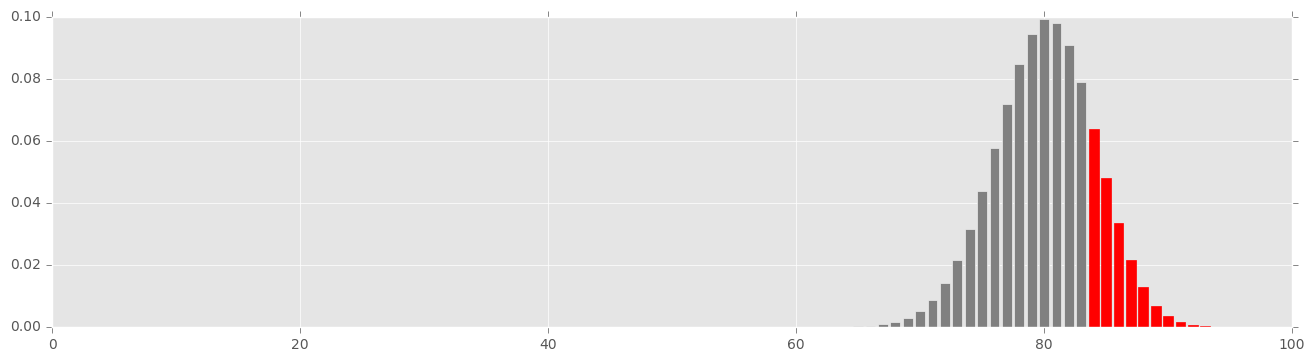

In [10]:
_, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [binomial.pdf(i) for i in xrange(101)], color='grey', align='center')
ax.set_xlim(0, 100)
for i in xrange(84, 101):
    bars[i].set_color('red')

In [11]:
p_value = 1. - binomial.cdf(84)
print('Probability of Observing Data Equal or More Extreme than Actual (p-value): {}'.\
      format(p_value))

Probability of Observing Data Equal or More Extreme than Actual (p-value): 0.128505514839


#### Compare the p-value to Your Stated Rejection Threshold

We decided to reject the null hypothesis at a threshold of $\alpha=.2$.  Since our p-value is less than this threshold, Matt can now work on some new tricks!

### One Sample Approximate Test of Population Proportion

Suppose in the previous example I want to test my hypothesis more rigorously.  Instead of skating for a day, Matt spends an entire month collecting data.

Let's say Matt attempts 100 kickflips a day, a total of 3100 kickflips, and landed 2531 of them.

In this case, our $N$ is quite large, so it's possible that we have a computer that cannot handle the exact calculations for the binomial distribution (we don't).

Luckily the central limit theorem tells us that a binomial with large $N$ is well approximated by a normal distribution with the appropriate mean and variance.

$$Binomial(3100,.8) \approx N(3100*.8, \sqrt{(3100)(.8)(1-.8)})$$

**Question:** How did I compute the mean and variance of this normal distribution?

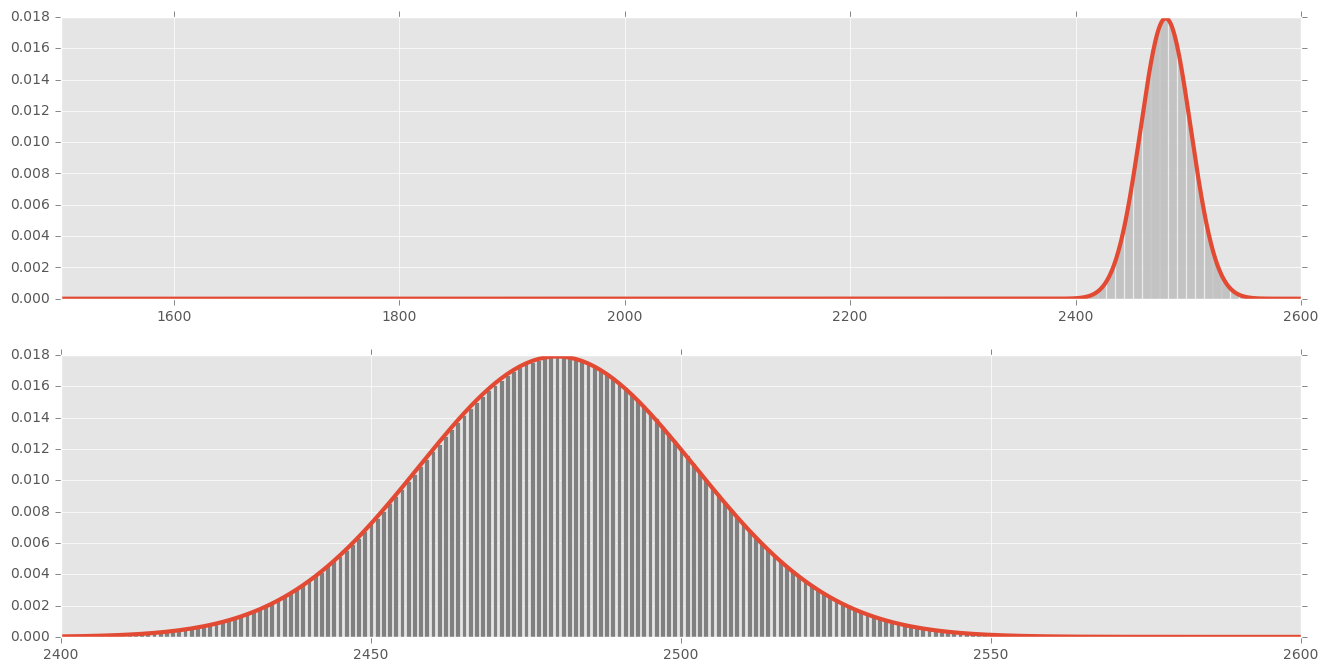

In [12]:
binomial_n = 3100
binomial_p = .8
binomial = spl.Binomial(3100, .8)

normal_mean = binomial_n*binomial_p
normal_var = binomial_n*binomial_p*(1-binomial_p)
normal = spl.Normal(normal_mean, np.sqrt(normal_var))

xs = np.linspace(0, 3100, num=3101)
_, axs = plt.subplots(2, figsize=(16, 8))
bar_sizes = [binomial.pdf(i) for i in xrange(3101)]

axs[0].bar(range(3101), bar_sizes, color='black', align='center')
axs[0].plot(xs, normal.pdf(xs), linewidth=3)
axs[0].set_xlim(1500, 2600)

axs[1].bar(range(3101), bar_sizes, color='grey', align='center')
axs[1].plot(xs, normal.pdf(xs), linewidth=3)
axs[1].set_xlim(2400, 2600)

pass

The approximation here is very good, so we can replace the exact binomial distribution with the approximate normal distribution.

The p-value for this one month experiment is:

$$P(\text{> 2531 Kickflips Landed} \mid \text{Null Hypothesis})$$

In [13]:
p_value = 1 - normal.cdf(2530)
print('Probability of Observing Data Equal or More Extreme than Actual (p-value): {}'.\
      format(p_value))

Probability of Observing Data Equal or More Extreme than Actual (p-value): 0.0123819391122


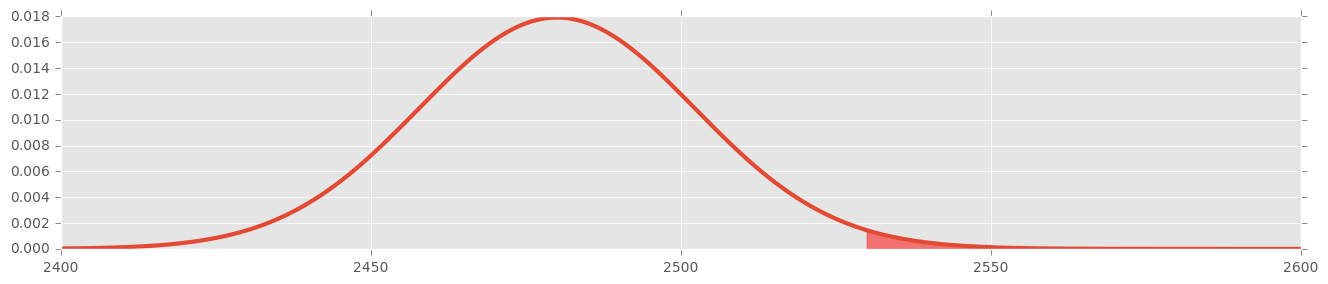

In [14]:
_, ax = plt.subplots(1, figsize=(16, 3))
ax.plot(xs, normal.pdf(xs), linewidth=3)
ax.set_xlim(2400, 2600)
ax.fill_between(xs, normal.pdf(xs), where=(xs >= 2530), color='red', alpha=.5)

The month of practice has made Matt much more confident in his skill, he should definitely move on to another trick.

The approximate test for a population proportion ("approximate" because the binomial distribution is approximated by a normal) is often called the **z-test for a population proportion** because the tables of tail probabilities of normal distributions that people would use to look up tail probabilities from the normal distribution back in the day were called "z-tables".

### Two Sample Approximate Test of Population Proportions

Now that Matt is confident in his kickflips, he wants to prove that he is better at them than his friend Nick, at least in terms of consistency.

On a day of skating together, Matt attempts 80 kickflips, landing 58, before hurting his ankle.  Nick finishes the full 100 and lands 65.

#### Take a Skeptical Stance, and Clearly State This Hypothesis

The skeptical stance would be that Matt is *not* better than Nick at kickflips, he is at best, equally good.  More precisely, our null hypothesis is that the frequency Matt lands kickflips is *at most* the frequency that Nick lands kickflips.

$$p_M=P(\text{Matt lands a kickflip})$$
$$p_N=P(\text{Nick lands a kickflip})$$

$$H_0: \ p_M \leq p_N$$

#### Create a Probabilistic Model of the Situation Assuming the Null Hypothesis is True

Assuming that each kickflip Matt tries is independent of all the rest (with the same for Nick), the number of kickflips Matt and Nick land in a fixed number of attempts are Binomial distributed.

$$\text{# of kickflips Matt lands} \sim Binomial(80, p_M)$$
$$\text{# of kickflips Nick lands} \sim Binomial(100, p_N)$$

The numbers here are smaller than before, but a normal approximation is still appropriate for each of these binomial distributions.

$$\text{# of kickflips Matt lands} \approx Normal(80p_M, \sqrt{80p_M(1-p_M)})$$
$$\text{# of kickflips Nick lands} \approx Normal(100p_N, \sqrt{100p_N(1-p_N)})$$

Now let's do something clever, let's instead consider the **frequency** that Matt and Nick land kickflips, instead of the actual number they landed.  This puts Matt and Nick on equal footing, which is necessary since they attempted different numbers of kickflips.

$$\text{Frequency Matt lands kickflips in a sample} \approx Normal \left( p_M, \sqrt{\frac{p_M(1-p_M)}{80}} \right)$$
$$\text{Frequency Nick lands kickflips in a sample} \approx Normal \left( p_N, \sqrt{\frac{p_N(1-p_N)}{100}} \right)$$

Finally, assuming that Matt landing a kickflip is independent of Nick landing a kickflip, we get a probabilistic model for the **difference in sample frequencies**.

$$\text{Difference in sample frequencies between Matt and Nick} \approx Normal \left( p_M - p_N, \sqrt{\frac{p_N(1-p_N)}{80} + \frac{p_M(1-p_M)}{100}} \right)$$

**Question:** How did I calculate the mean and variance of this final normal distribution?

Our null hypothesis is:

$$H_0: \ p_M \leq p_N \ or \ p_M - p_N \leq 0$$
    
With $p_M=p_N \equiv p$, our probabilistic model under the null reduce to:

$$\text{Difference in sample frequencies between Matt and Nick} \approx Normal \left( 0, \sqrt{\frac{p(1-p)}{80} + \frac{p(1-p)}{100}} \right) $$

The last problem is that we **don't know the true frequencies $p_M$ and $p_N$, nor the assummed shared frequency p**, (if we did, we would'nt need the statistical test).  Our only resort is to substitute an estimate of the shared value from the sample:

$$\text{Difference in sample frequencies between Matt and Nick} \approx Normal \left( 0, \sqrt{\frac{(80 + 100) \hat p(1- \hat p)}{80 \times 100}} \right) \text{with} \ \hat p=\frac{58+65}{80+100}$$

In [15]:
shared_mean = 0

shared_frequency = (58. + 65) / (80 + 100)
shared_var = (80 + 100) * (shared_frequency * (1 - shared_frequency)) / (80 * 100)

normal = spl.Normal(shared_mean, np.sqrt(shared_var))

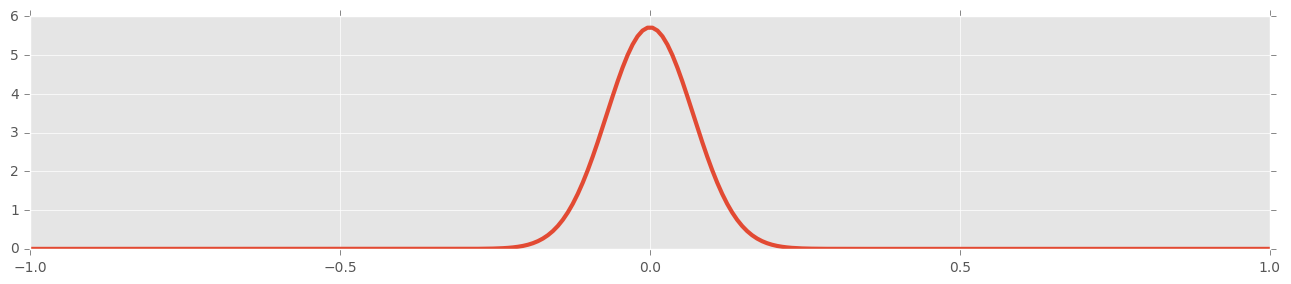

In [16]:
_, ax = plt.subplots(1, figsize=(16, 3))
xs = np.linspace(-1, 1, num=250)
ax.plot(xs, normal.pdf(xs), linewidth=3)
ax.set_xlim(-1, 1)

pass

#### Decide how Surprised You Need to Be to Reject Your Skeptical Assumption

Tricky in this situation, depends on what Matt wants to do with the information.  

Matt wants to be a jerk, and rub it in his friend's face, but to do so, he better be really sure.  So let's set the rejection threshold pretty stringently: $\alpha=.02$.

#### Collect Your Data

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created

The difference in proportions in the observed sample is:

In [17]:
matt_sample_frequency = 58./80
nick_sample_frequency = 65./100

difference_in_sample_frequency = matt_sample_frequency - nick_sample_frequency
print('Difference in sample frequency between Matt and Nick: {}'.format(difference_in_sample_frequency))

Difference in sample frequency between Matt and Nick: 0.075


So the p-value for our experiment is:

$$P(\text{Difference in frequencies equal to or more extreme than observed} \mid \text{Null hypothesis})$$

In [18]:
p_value = 1 - normal.cdf(difference_in_sample_frequency)
print('Probability of Observing Data Equal or More Extreme than Actual (p-value): {}'.\
      format(p_value))

Probability of Observing Data Equal or More Extreme than Actual (p-value): 0.141218360303


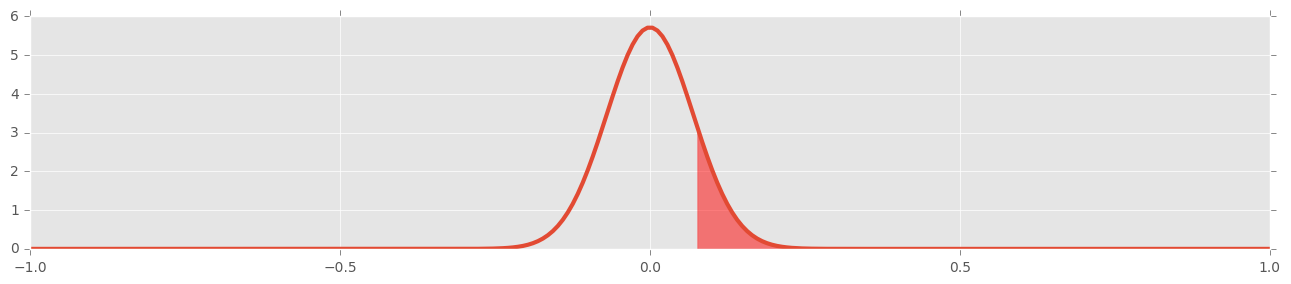

In [19]:
_, ax = plt.subplots(1, figsize=(16, 3))
xs = np.linspace(-1, 1, num=250)
ax.plot(xs, normal.pdf(xs), linewidth=3)
ax.fill_between(xs, normal.pdf(xs), where=(xs >= difference_in_sample_frequency),
                color='red', alpha=.5)
ax.set_xlim(-1, 1)

pass

#### Compare the p-value to Your Stated Rejection Threshold

We're nowhere near confident enough in our superior ability to brag, so let's back off that for the moment.

The two sample approximate test for population proportions is sometimes called the **two sample z-test**, for similar reasons as before.

### Two Sample Approximate Test of Population Means

Next, Matt and Nick want to see who can kickflip **higher**.  They set up a measuring tape, and each carefully measure the heights of 25 of their kickflips (in feet).

In [20]:
matt_heights = [1.5, .9, .9, 1.3, 2.1, 1.9, 1.6, 1.4, 2.3, 1.0, 1.5, .9, 2.1,
                1.3, 1.4, 2.1, 1.2, 1.7, 1.7, 2.0, 1.6, 1.2, 1.6, 1.7, 1.5]

nick_heights = [1.9, 1.8, 1.3, 2.3, 1.7, 1.9, 2.7, 2.1, 2.2, 1.5, 1.8, 2.0, 1.1,
                1.7, 2.1, 1.5, 2.3, 1.5, 2.0, 2.4, 1.5, 1.4, 1.6, 1.8, 1.0]

[<matplotlib.text.Text at 0x1257a1d90>, <matplotlib.text.Text at 0x1257b67d0>]

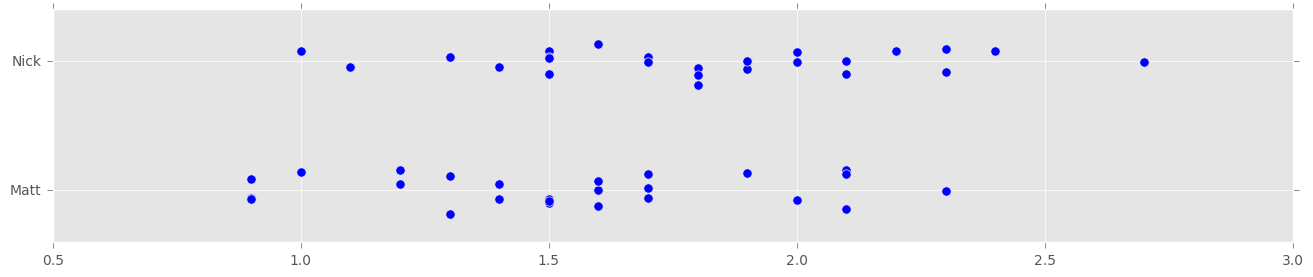

In [21]:
_, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(matt_heights, np.repeat(0, len(matt_heights)) + np.random.normal(0, .1, len(matt_heights)), s=45)
ax.scatter(nick_heights, np.repeat(1, len(nick_heights)) + np.random.normal(0, .1, len(matt_heights)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Matt', 'Nick'])

The data looks like Nick can consistently kickflip higher than Matt, but let's construct a formal test of this.

#### Take a Skeptical Stance, and Clearly State This Hypothesis

Skepticism here is a bit hard to interpret.  A good baseline assumption seems to be:

> There is no difference in how high Nick and Matt can kickflip.

Now there is clearly random variation in each **individual**  kickflip, so a more precise baseline assumption would be

> There is no difference in the average heights of kickflips performed by Nick and Matt.

#### Create a Probabilistic Model of the Situation Assuming the Null Hypothesis is True

Our question concerns population averages (is Matt's population average different than Nick's).  Our measurements are **sample averages**, which, from the central limit theorem, we know are approximately normally distributed given the population average:

$$\text{Sample average of Matt's kickflips} \sim Normal \left( \mu_M, \sqrt{\frac{\sigma^2_M}{25}} \right) $$
$$\text{Sample average of Nick's kickflips} \sim Normal \left( \mu_N, \sqrt{\frac{\sigma^2_N}{25}} \right) $$

Again, if we are willing to assume that the height of Matt's individual kickflips are independent from Nick's, then we can compress the important information into one normal distribution:

$$\text{Difference in sample averages} \sim Normal \left( \mu_M - \mu_N, \sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}} \right) $$

Under the assumption of the null hypothesis:

$$\text{Difference in sample averages} \sim Normal \left( 0, \sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}} \right)$$

We're in a similar situation to last time, we do not know the population variances.

In the prior problem, our assumptions allowed us to compute the relevant variance from the shared population frequency (which we estimated with the sample frequency).  There are two differences here:

- There are two independent variances, which we have no reason to believe are the same.
- The variances are independent parameters, unrelated to the mean.
  
In cases where we have to independently estimate the variance of a normal distribution from the same samples we are testing, this estimation of the variance contributes to uncertainty in our test.

#### Welch's Test

To rectify the problem, we first convert to a sample statistic whose variance is expected to be 1.

$$\frac{\text{Difference in sample averages}}{\sqrt{\frac{\sigma^2_M}{25}+\frac{\sigma^2_N}{25}}}$$

Now we still have a similar issue to the two sample test of population proportions, we do not know the population variances in the denominator of the formula, so our only recourse is to substitute in the sample variances:

$$t=\frac{\text{Difference in sample averages}}{\sqrt{\frac{\hat \sigma^2_M}{25}+\frac{\hat \sigma^2_N}{25}}}$$

In [22]:
def welch_test_statistic(sample_1, sample_2):
    return (np.mean(sample_1) - np.mean(sample_2)) / \
           np.sqrt((np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2)))

In [23]:
test_statistic = welch_test_statistic(matt_heights, nick_heights)
print('Welch Test Statistic: {}'.format(test_statistic))

Welch Test Statistic: -2.37965991476


Unfortunately, this changes the distribution of the test statistic.  Instead of using a normal distribution, we must not use a **Student's t-distribution**, which accounts for the extra uncertainty in estimating the two new parameters.

The Student's t-distribution has mean 0, variance 1, and one parameter, the **degrees of freedom**.  Smaller degrees of freedom have heavier tails, with the distribution becoming more normal as the degrees of freedom gets larger.

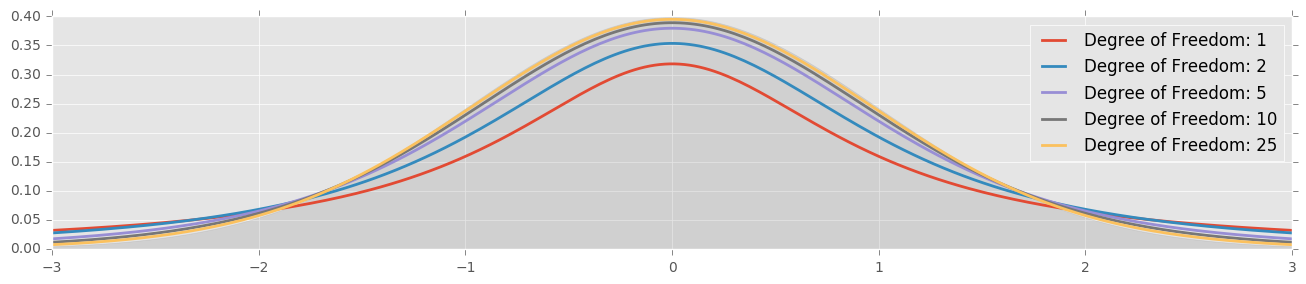

In [24]:
dfs = [1, 2, 5, 10, 25]
xs = np.linspace(-3, 3, num=250)
_, ax = plt.subplots(1, figsize=(16, 3))
normal = spl.Normal(0, 1)
ax.fill_between(xs, normal.pdf(xs), color='grey', alpha=.2)
for df in dfs:
    students = spl.Students(df)
    ax.plot(xs, students.pdf(xs), linewidth=2, label='Degree of Freedom: {}'.format(df))
ax.legend()

**Welch's t-test** says that in this situation, the distribution of t is well approximated with a Student's distribution with an appropriate degree of freedom.  The degrees of freedom calculation is complex, enough that it has a name, the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Muriel_Bristol).  The resulting application to our situation results in [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test).

In [25]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [26]:
df = welch_satterhwaithe_df(nick_heights, matt_heights)
print("Degrees of Freedom for Welch's Test: {}".format(df))

Degrees of Freedom for Welch's Test: 47.965694573


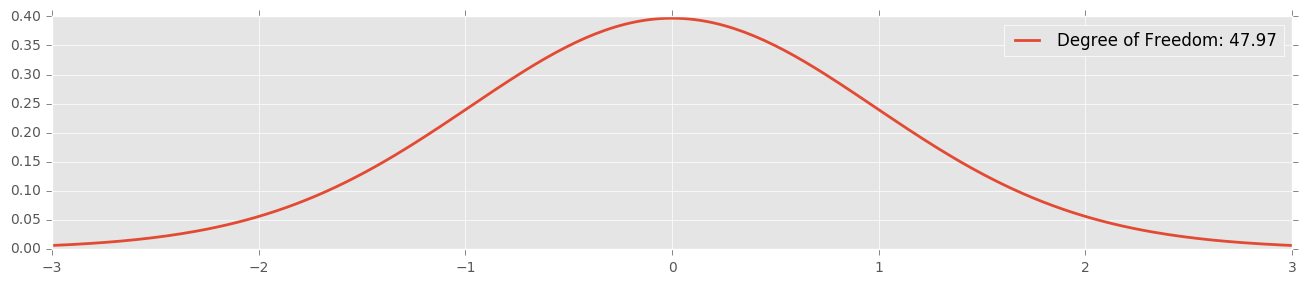

In [27]:
xs = np.linspace(-3, 3, num=250)
_, ax = plt.subplots(1, figsize=(16, 3))
students = spl.Students(df)
ax.plot(xs, students.pdf(xs), linewidth=2, label='Degree of Freedom: {:2.2f}'.format(df))
ax.legend()

#### Decide how Surprised You Need to Be to Reject Your Skeptical Assumption

Given the bragging rights at stake here, and how much they value to friendship, Matt and Nick decide to be reasonably skeptical, so take $\alpha=.05$.

#### Calculate the Probability of Finding a Result Equally or More Extreme than Actually Observed Assuming the Probabilistic Model You Created

An interesting wrinkle here.  We have no prior assumption about whether Nick is better than Matt, or Matt is better than Nick, so a difference could go in either direction.

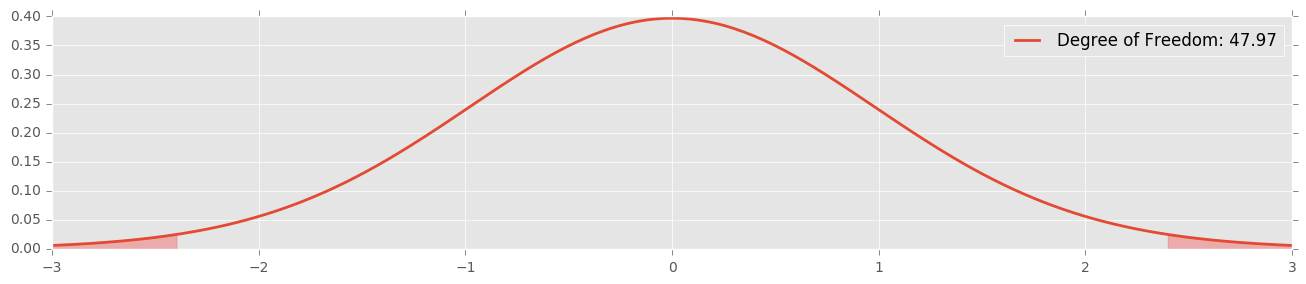

In [28]:
xs = np.linspace(-3, 3, num=250)
_, ax = plt.subplots(1, figsize=(16, 3))
students = spl.Students(df)
ax.plot(xs, students.pdf(xs), linewidth=2, label='Degree of Freedom: {:2.2f}'.format(df))
_ = ax.fill_between(xs, students.pdf(xs), where=(xs >= -test_statistic), color='red', alpha=.25)
_ = ax.fill_between(xs, students.pdf(xs), where=(xs <= test_statistic), color='red', alpha=.25)
ax.legend()

In [29]:
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))

print('Probability of Observing Data Equal or More Extreme than Actual (p-value): {}'.\
      format(p_value))

Probability of Observing Data Equal or More Extreme than Actual (p-value): 0.0213535344634


So we have enough evidence to conclude that **one of Nick or Matt is better**.

Look's like in this case we should be able to conclude that Nick is better, let's test that.

In [30]:
test_statistic = welch_test_statistic(nick_heights, matt_heights)

p_value = 1 - students.cdf(test_statistic)

print('Probability of Observing Data Equal or More Extreme than Actual (p-value): {}'.\
      format(p_value))

Probability of Observing Data Equal or More Extreme than Actual (p-value): 0.0106767672317


So Nick is clearly better.

### Type I and Type II Errors

Recall that we set a rejection threshold *before* running the experiment, and it is related to the weight of evidence we require before rejecting the null hypothesis.  I.e., we reject the null hypothesis when our computed p-value is less than our rejection threshold.

In the situation where the **null hypothesis is actually true**, setting a rejection threshold of, say, .05 ensures that we will **only falsely reject the null hypothesis 5% of the time**.  Falsely rejecting the null hypothesis is called a **false positive**, or a **type one error**.

On the other end, failing to reject the null hypothesis when the scientific hypothesis is **true** is called a **false negative** or a **type two error**.

Studying the type two error rate takes some new concepts (mainly statistical power), which will be the subject of tomorrow's lesson.

<img src='Type_I_and_Type_II_Error_Table.jpg'>

### Multiple Testing: The Problem

Consider the case that we would like to test **all three** of the hypothesis in our skateboarding examples at a rejection threshold of .05:

- Matt lands kickflips at a rate greater that .8.
- Matt lands kickflips at a greater rate than Nick.
- Matt and Nick kickflip at the same average height.
  
Suppose that :

- All our hypotheses are, in reality, false. 
- We view our combined test as a failure if we falsely reject **any** of the null hypotheses.
  
Then preforming three separate hypothesis tests at a rejection threshold of .05 is **incorrect**.

**Question:** If we preform three separate tests at a threshold of .05, what is the combined rejection threshold?

In this case, we do not get a combined rejection threshold of .05.  It is in reality:

In [31]:
n = 3
alpha = .05
rejection_threshold = alpha

#non_rejection_threshold = 1 - rejection_threshold
non_rejection_threshold = 1 - alpha

# combined_non_rejection_threshold = rejection_threshold ** n
combined_non_rejection_threshold = (1 - alpha) ** n

# combined_rejection_threshold = combined_non_rejection_threshold
combined_rejection_threshold = 1 - (1 - alpha) ** n

print('Combined rejection threshold/alpha: {}'.format(combined_rejection_threshold))

Combined rejection threshold/alpha: 0.142625


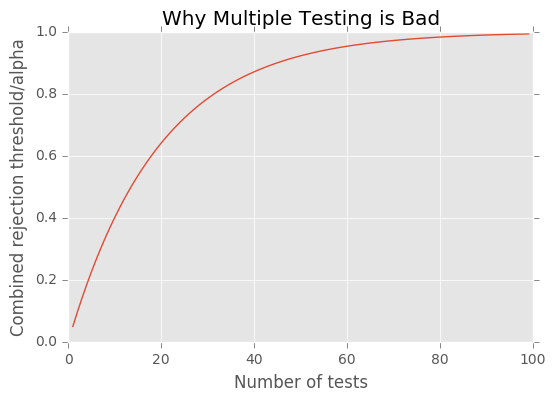

In [32]:
n = 100
ns = range(1, n)
combined_alphas = [(1 - (1 - alpha) ** n) for n in ns]
plt.plot(ns, combined_alphas)
plt.xlabel('Number of tests')
plt.ylabel('Combined rejection threshold/alpha')
plt.title('Why Multiple Testing is Bad')

Clearly, we are falsely rejecting much more than we should be.

### Bonferroni Correction

The **Bonferroni Correction** is a popular way to rectify the over testing issue.

Suppose we want to test a combined hypothesis as a threshold of $\alpha$.  The Bonferroni correction procedure then tests each of the individual hypothesis at a threshold of:

$$\alpha_\text{Bonferroni}=\frac{\alpha}{\text{# of Hypothesis in Combined Hypothesis}}$$

Let's check that this fixes the issue in our simulation.

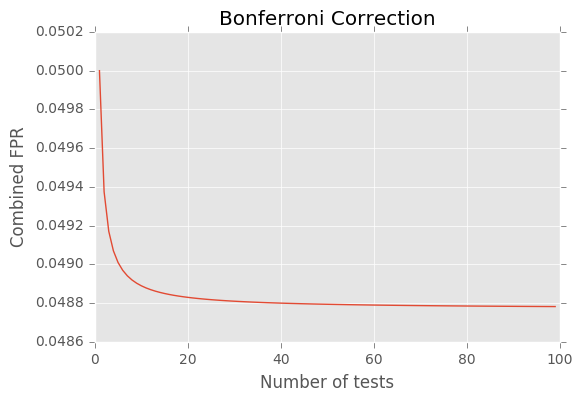

In [33]:
n = 100
ns = range(1, n)
combined_fprs = [(1 - (1 - alpha / n) ** n) for n in ns]
plt.plot(ns, combined_fprs)
plt.xlabel('Number of tests')
plt.ylabel('Combined FPR')
plt.title('Bonferroni Correction')

Bonferroni is slightly conservative.

## Chi-squared Tests

### Example: Linear Congruential Generators

You've been contracted to create a small game that will run on an [embedded system](https://en.wikipedia.org/wiki/Embedded_system) (think, for example, a [Tamagotchi](https://en.wikipedia.org/wiki/Tamagotchi).  The system does not have many resources, so you have to create your own random number generator.

After some research, you hit on a lightweight solution, a [linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator).  To scope things out, you code a simple generator in Python.

In [34]:
class LinearCongruentialGenerator(object):
    
    def __init__(self, a, c, modulus, seed):
        self._a = a
        self._c = c
        self._modulus = modulus
        self._seed = seed
        
    def next(self):
        next_sample = (self._a * self._seed + self._c) % self._modulus
        self._seed = next_sample
        return next_sample
    
    def sample(self, n):
        l = []
        for _ in xrange(n + 1):
            l.append(lcm.next())
        return np.array(l)

And lookup some parameters to use online.

In [35]:
lcm = LinearCongruentialGenerator(48271, 0, 2**31 - 1, 1)

You want to test if your code really works, which involves assessing the "randomness" of your generator.  

**Discussion:** How would you assess the quality of your random numbers.

To start, you decide to test the following two properties

- If you use the generator to simulate a die roll, the results should be uniformly distributed on the set {1, 2, 3, 4, 5, 6}.
- If you compare the generated random numbers in pairs, the first number should be less than the second approximately half of the time.
  
Since the generator will only be used in small bursts of activity, you decide to run these tests on a small sample.

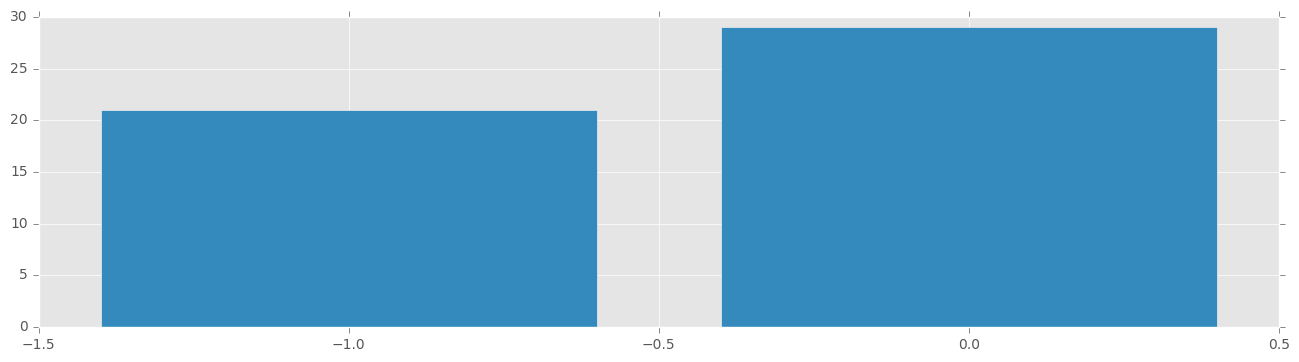

In [36]:
randoms = lcm.sample(50)
firsts = randoms[1:]
seconds = randoms[:-1]
relative_changes = (firsts - seconds) > 0
relative_change_freqs = np.bincount(relative_changes)
_, ax = plt.subplots(1, figsize=(16, 4))
_ = ax.bar(range(-1, 1), relative_change_freqs, align='center')

<Container object of 6 artists>

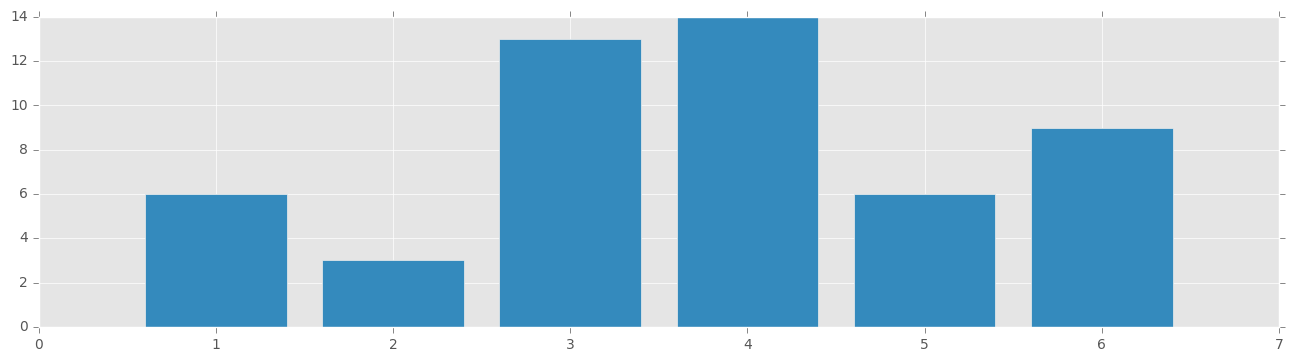

In [37]:
dice_rolls = lcm.sample(50) % 6
dice_freqs = np.bincount(dice_rolls)
_, ax = plt.subplots(1, figsize=(16, 4))
ax.bar(range(1, 7), dice_freqs, align='center')

How can we test whether the fluctuations in these bar charts are likely to have occurred by chance?

### The Chi-squared Test for Distribution

The first step is to arrange our results into a **contingency table**, which compares the expected frequency to the observed frequency.

In [38]:
relative_changes_contingency_table = pd.DataFrame(
    {'expected': [25, 25] , 'actual': relative_change_freqs}
)

print(relative_changes_contingency_table)

   actual  expected
0      21        25
1      29        25


In [39]:
dice_rolls_contingency_table = pd.DataFrame(
    {'expected': np.repeat(8.3, 6) , 'actual': dice_freqs}
)

print(dice_rolls_contingency_table)

   actual  expected
0       6       8.3
1       3       8.3
2      13       8.3
3      14       8.3
4       6       8.3
5       9       8.3


The **Chi Squared Test for Distribution**, (also known as the **Chi Squared Test for Goodness of Fit** tests the hypothesis that the **actual** data could have been generated from a discrete distribution which generates the **expected data** on average. 

#### Assemble the Contingency Table

We've already done this step.  Good to go.

#### Compute the Test Statistic

The first step in the Chi Squared test is to compute the following test statistic:

$$T=\sum_i \frac{(O_i - E_i)^2}{E_i}$$

In [40]:
def chi_squared_test_statistic(observed, expected):
    return np.sum((observed - expected)**2 / expected)

#### Perform the Test

The math behind the Chi-squared test is, unfortunately, complex.  If you are interested in the derivation, you can find it [here](https://en.wikipedia.org/wiki/Pearson's_chi-squared_test).  The final story is that the test statistic $T$ is Chi-squared distributed.

The Chi-squared distribution has one parameter, the degrees of freedom.

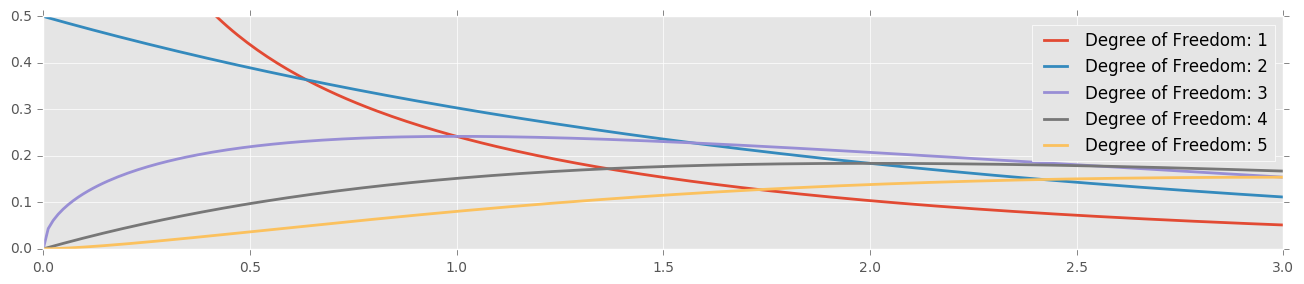

In [41]:
dfs = [1, 2, 3, 4, 5]
xs = np.linspace(0, 3, num=250)
_, ax = plt.subplots(1, figsize=(16, 3))
for df in dfs:
    chisq = spl.ChiSquared(df)
    ax.plot(xs, chisq.pdf(xs), linewidth=2, label='Degree of Freedom: {}'.format(df))
ax.set_ylim(0, .5)
ax.legend()

The degrees of freedom for the Chi-squared is:
    
$$\text{Number of co-variates}+1$$

So let's apply this to our contingency tables.

#### The Dice Rolls

In this case, our degrees of freedom for the Chi-squared distribution is:

$$(6-1)+1=6$$

And the test statistic is:

In [42]:
t = chi_squared_test_statistic(dice_rolls_contingency_table.actual, 
                               dice_rolls_contingency_table.expected)

So our p-value for the test is:

In [43]:
test_distribution = spl.ChiSquared(6)
p_value = 1 - test_distribution.cdf(t)
print('p-value for dice rolls: {}'.format(p_value))

p-value for dice rolls: 0.0797047241232


Looks like this experiment does *not* give us enough evidence to conclude that our random number generator produces fair rolls.  Looks like we should do more research.

**Exercise:** Do the other test, of consecutive differences.